In [1]:
#import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Introduction

I'm interested in doing some exploration on FIFA 18 Dataset and figure out the answers for the following questions:

Question 1: Which Nation has most number of Soccer Players collected in FIFA 18, list the top 20 Nations

Question 2: How about the age distribution of the FIFA 18 Players?

Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage

### Understading the Data

This project uses FIFA 18 Complete Player Dataset from kaggle. For this project, I have used the CompleteDataset.csv which contains all the information of the Players in FIFA 18.

Below are the steps to look at and understand the dataset.

In [4]:
# Read in the Complete Dataset
CD = pd.read_csv('./CompleteDataset.csv')
CD.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Basic info of the dataset
CD.describe()

,Unnamed: 0,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,8990.000000,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,5190.811931,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,0.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,4495.000000,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8990.000000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,13485.000000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


In [6]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
Unnamed: 0             17981 non-null int64
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null obj

In [7]:
num_rows = CD.shape[0] #Provide the number of rows    in the dataset
num_cols = CD.shape[1] #Provide the number of columns in the dataset
print("Number of Rows: {}".format(num_rows))
print("Number of Columns: {}".format(num_cols))

Number of Rows: 17981
Number of Columns: 75


### Prepare Data
Some data preparation steps need to be done before using the dataset for exploration, including：

1. Dropping unused columns
2. Checking columns with missing values and analyze impact
3. Convert string values into numbers for Value & Wage

In [8]:
# Data Preparation Step 1: Dropping columns not used in this project
CD.drop('Photo',     axis = 1,inplace=True)
CD.drop('Flag',      axis = 1,inplace=True)
CD.drop('Club Logo', axis = 1,inplace=True)
CD.drop('ID',        axis = 1,inplace=True)
CD.head()

,Unnamed: 0,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,€95.5M,€565K,2228,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,Argentina,93,93,FC Barcelona,€105M,€565K,2154,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,Brazil,92,94,Paris Saint-Germain,€123M,€280K,2100,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,Uruguay,92,92,FC Barcelona,€97M,€510K,2291,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,Germany,92,92,FC Bayern Munich,€61M,€230K,1493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Data Preparation Step 2: Check whether any column has missing values
columns_with_missing_values = set(CD.columns[CD.isnull().mean()!=0])
print(columns_with_missing_values)

{'LCB', 'LB', 'RS', 'ST', 'RM', 'RB', 'Club', 'LM', 'RCM', 'CDM', 'LAM', 'LF', 'LDM', 'CB', 'LCM', 'CM', 'CAM', 'RWB', 'LW', 'RW', 'RDM', 'RF', 'LS', 'LWB', 'RCB', 'CF', 'RAM'}


Most of these columns with missing values are ratings at all positions. These missing values are reasonable as a Goal Keeper may not have the position rating on other positions beside GK. These columns are not required to answer my questions, except Club. However a player with missing value in 'Club' may be due to the fact that he doesn't belong to any club for the moment, which means he is still available on free transfer. Any club insterested in him may sign this player without paying any transfer fee (The player's market value)

In [10]:
# function to convert string to mumber
def str2number(amount):
    """
    This function converts amount values in string to float
    
    Parameter:
    amount(str): Amount values in string type with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount[-1] == 'M':
        return float(amount[1:-1])*1000000
    elif amount[-1] == 'K':
        return float(amount[1:-1])*1000
    else:
        return float(amount[1:])

In [11]:
# Data Preparation Step 3: Convert string values into numbers for Value & Wage

# Create New Wage_Number column to store numerical type Wage info
CD['Wage_Number']  = CD['Wage'].map(lambda x: str2number(x))

#Create New Value_Number column to store numerical type Value info
CD['Value_Number'] = CD['Value'].map(lambda x: str2number(x))

In [14]:
CD['Value_Number'].head()

0     95500000.0
1    105000000.0
2    123000000.0
3     97000000.0
4     61000000.0
Name: Value_Number, dtype: float64

### Finding Answers to Questions
After data preparation, next step is to answer the questions I have raised earlier:

England                1630
Germany                1140
Spain                  1019
France                  978
Argentina               965
Brazil                  812
Italy                   799
Colombia                592
Japan                   469
Netherlands             429
Republic of Ireland     417
United States           381
Chile                   375
Sweden                  368
Portugal                367
Mexico                  360
Denmark                 346
Poland                  337
Norway                  333
Korea Republic          330
Name: Nationality, dtype: int64


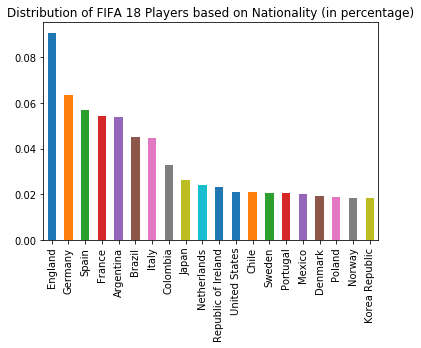

In [16]:
# Question 1: Which Nation has most number of Soccer Players collected in FIFA 18, list the top 20 Nations
nation_vals = CD.Nationality.value_counts()
print(nation_vals.head(20))

(nation_vals.head(20)/CD.shape[0]).plot(kind="bar");
plt.title("Distribution of FIFA 18 Players based on Nationality (in percentage)");

From the result and the graph it is evident that England, Germany, Spain and France are the top 4 nations having most players in FIFA 18. Its reasonable as the famous football leagues are based in Europe. Argentina and Brazil are ranked 5th and 6th followed by Italy.

25    1522
23    1394
24    1334
22    1324
21    1286
20    1245
26    1202
27    1152
29    1121
19    1069
28    1051
30     804
18     672
31     671
33     617
32     506
34     272
17     258
35     191
36     136
Name: Age, dtype: int64


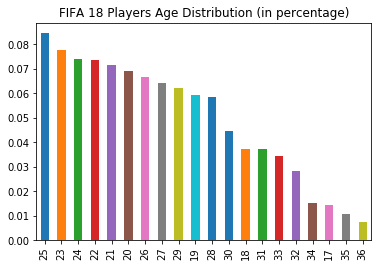

In [21]:
# Question 2: How about the age distribution of the FIFA 18 Players?
age_vals = CD.Age.value_counts()
print(age_vals.head(20))

(age_vals.head(20)/CD.shape[0]).plot(kind="bar");
plt.title("FIFA 18 Players Age Distribution (in percentage)");

It’s clear that most players are between 21–25 years old. It’s reasonable as players in this age group are the best athletes. Players younger than that may not have the enough skills / experience and also may not have the chance to prove themself on the football field yet. Players older than close to 30 or above may soon retire from the football filed. Thus the number of players drop with increase in age from 30.

In [23]:
# Question 3: Find out the top 10 clubs with highest total player market value, and the highest average player wage
Value_Wage = CD[["Name", "Club", "Value_Number", "Wage_Number"]]
Value_Wage.head()

,Name,Club,Value_Number,Wage_Number
0,Cristiano Ronaldo,Real Madrid CF,95500000.0,565000.0
1,L. Messi,FC Barcelona,105000000.0,565000.0
2,Neymar,Paris Saint-Germain,123000000.0,280000.0
3,L. Suárez,FC Barcelona,97000000.0,510000.0
4,M. Neuer,FC Bayern Munich,61000000.0,230000.0


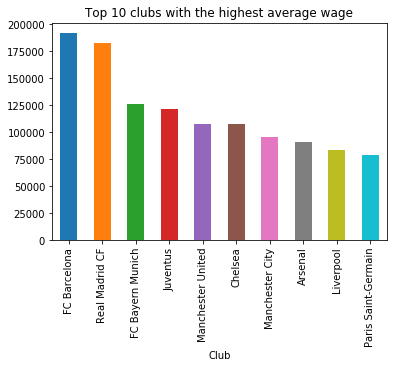

In [24]:
# Find out the top 10 clubs with the highest average wage
Value_Wage.groupby("Club")["Wage_Number"].mean().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest average wage");

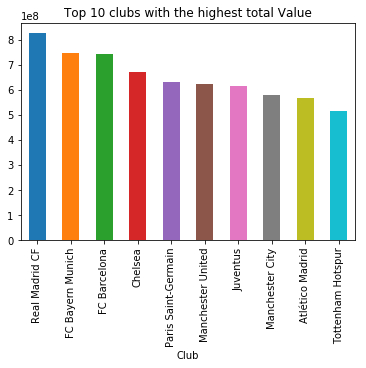

In [25]:
# Find out the top 10 clubs with the highest total player market value
Value_Wage.groupby("Club")["Value_Number"].sum().sort_values(ascending=False).head(10).plot(kind="bar");
plt.title("Top 10 clubs with the highest total Value");

Football players of FC Barcelona, Real Madrid CF and FC Bayern Munich have the most high earning players compared to other clubs. Higher wages help these clubs to attract valuable players to play for their clubs.